성균관대학교 바이오메카트로닉스학과 김지수
1. 관심 분야: 컴퓨터 비전 분야에 흥미를 느껴서 공부하고 있습니다.
2. 주로 사용하는 언어: python -> 잘하지는 않지만 프로젝트 만드는데 문제는 없다 생각합니다. c++ -> 컴퓨터 비전에 많이 사용된다고 들어서 최근 공부하고 있습니다.
3. 팀 구성은 아직 따로 말을 나눈게 없습니다.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2
import numpy as np
import glob
import PIL

In [3]:
meta_data = pd.read_csv('/content/drive/Othercomputers/내 노트북/실습자료/인공지능2 실습/bee_imgs/bee_data.csv')

In [4]:
from pandas.core.common import random_state
df = pd.DataFrame(meta_data, columns=['file', 'subspecies', 'health']) #['file', 'subspecies']
df = df.sample(n = 5172, random_state=23)  # 데이터를 랜덤한 순서로 다시 정렬하기 위해 전체 데이터를 샘플링하는 방식으로 진행했습니다.

In [5]:
df

,file,subspecies,health
2880,010_409.png,Carniolan honey bee,healthy
535,036_088.png,Italian honey bee,"few varrao, hive beetles"
2857,010_752.png,Carniolan honey bee,healthy
3701,013_023.png,Italian honey bee,ant problems
4160,032_865.png,Russian honey bee,healthy
...,...,...,...
2998,039_013.png,-1,hive being robbed
1993,016_171.png,-1,healthy
1064,030_737.png,Italian honey bee,ant problems
4838,019_1095.png,Italian honey bee,healthy


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# glob을 사용하면 오름차순으로 저장되는데, dir + df['file'] 로 하면 df에 저장된 순서로 이미지를 정렬할 수 있습니다.

dir = '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/'
img_names = [dir + x for x in df['file']]

In [8]:
img_names

['/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/010_409.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/036_088.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/010_752.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/013_023.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/032_865.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/005_621.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/021_221.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/020_015.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/033_073.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/040_557.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/010_804.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/017_026.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/043_020.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/030_858.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/015_699.png',
 '/content/drive/MyDrive/

In [9]:
# 이미지 사이즈는 2의 제곱수가 좋다는 설이 있기 있기 떄문에 적당한 크기라고 생각되는 64를 사용했습니다.

IMG_SIZE = 64
x_lst = []
x_lst += [(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in img_names]
# x_lst += [(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in img_names[:2000]]
# x_lst += [(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in img_names[:3000]]
# x_lst += [(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in img_names[:4310]]
# # x_lst += [(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in img_names[4000:]]
# x_lst_test = [(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in img_names[4310:]]

x_lst = np.array(x_lst)

In [10]:
img_names[0:100]

['/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/010_409.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/036_088.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/010_752.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/013_023.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/032_865.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/005_621.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/021_221.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/020_015.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/033_073.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/040_557.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/010_804.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/017_026.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/043_020.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/030_858.png',
 '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/015_699.png',
 '/content/drive/MyDrive/

In [11]:
df

,file,subspecies,health
2880,010_409.png,Carniolan honey bee,healthy
535,036_088.png,Italian honey bee,"few varrao, hive beetles"
2857,010_752.png,Carniolan honey bee,healthy
3701,013_023.png,Italian honey bee,ant problems
4160,032_865.png,Russian honey bee,healthy
...,...,...,...
2998,039_013.png,-1,hive being robbed
1993,016_171.png,-1,healthy
1064,030_737.png,Italian honey bee,ant problems
4838,019_1095.png,Italian honey bee,healthy


In [12]:
h_labels = df['health']  
h_state = list(set(h_labels))
sub_labels = df['subspecies']
sub_list = list(set(sub_labels))

In [13]:
x_lst.shape

(5172, 64, 64, 3)

In [14]:
'''
['missing queen',                 0
 'hive being robbed',             1
 'ant problems',                  2
 'few varrao, hive beetles',      3
 'healthy',                       4    
 'Varroa, Small Hive Beetles']    5   
 '''

h_state

['missing queen',
 'Varroa, Small Hive Beetles',
 'healthy',
 'few varrao, hive beetles',
 'hive being robbed',
 'ant problems']

In [15]:
y_lst_health = []
for h in h_labels:
  for idx, x in enumerate(h_state):
    if h == x:
      y_lst_health.append(idx)

In [16]:
y_lst_health = np.array(y_lst_health).reshape(-1,1)
y_lst_health.shape

(5172, 1)

In [17]:
'''
['Russian honey bee',      0
 'Western honey bee',      1  
 'Italian honey bee',      2   
 '1 Mixed local stock 2',  3     
 'VSH Italian honey bee',  4            
 '-1',                     5      
 'Carniolan honey bee']    6  
'''

sub_list

['VSH Italian honey bee',
 'Russian honey bee',
 '-1',
 '1 Mixed local stock 2',
 'Italian honey bee',
 'Carniolan honey bee',
 'Western honey bee']

위 두가지 특징에 대해서 라벨을 대략적으로 정해줬으니, 반복문을 통해 문자열로 된 각 상태를 숫자로 라벨링 해줍니다.

In [18]:
y_lst_subs = []
for s in sub_labels:
  for idx, y in enumerate(sub_list):
    if s == y:
      y_lst_subs.append(idx)

In [19]:
y_lst_subs = np.array(y_lst_subs).reshape(-1,1)
y_lst_subs.shape, y_lst_subs

((5172, 1), array([[5],
        [4],
        [5],
        ...,
        [4],
        [4],
        [0]]))

In [20]:
# 건강 상태를 나타내는 데이터 셋 분류. 데이터의 크기가 6으로 나누어떨어지기에 5:1로 학습 데이터와 평가 데이터로 나눴습니다.
x_train, y_health_train, y_subs_train = x_lst[:4310]/255, y_lst_health[:4310], y_lst_subs[:4310]
x_test, y_health_test, y_subs_test = x_lst[4310:]/255, y_lst_health[4310:], y_lst_subs[4310:]

Create Model For Health

In [21]:
model1 = tf.keras.models.Sequential()
# conv 1
model1.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))  # conv2d 수행하면 64채널의 결과가 나오고, kernelsize = 3
model1.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# con1v 2
model1.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# con1v 3
model1.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.5))                           # DO3
model1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# den1se layers
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(6, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

In [22]:
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
saved_model = '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/health.h5'
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint(saved_model, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [24]:
history = model1.fit(x_train, y_health_train, epochs=100,
                     callbacks=[es, mc],
                     validation_data=(x_test, y_health_test))

Epoch 1/100
135/135 [==============================] - ETA: 0s - loss: 0.8864 - accuracy: 0.6870
Epoch 1: val_accuracy improved from -inf to 0.78074, saving model to /content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/health.h5
135/135 [==============================] - 5s 18ms/step - loss: 0.8864 - accuracy: 0.6870 - val_loss: 1.1692 - val_accuracy: 0.7807
Epoch 2/100
131/135 [============================>.] - ETA: 0s - loss: 0.4219 - accuracy: 0.8344
Epoch 2: val_accuracy improved from 0.78074 to 0.83643, saving model to /content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/health.h5
135/135 [==============================] - 2s 12ms/step - loss: 0.4228 - accuracy: 0.8346 - val_loss: 0.9952 - val_accuracy: 0.8364
Epoch 3/100
135/135 [==============================] - ETA: 0s - loss: 0.2946 - accuracy: 0.8819
Epoch 3: val_accuracy improved from 0.83643 to 0.85963, saving model to /content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/health.h5
135/135 [==============================] - 2s 12ms/step

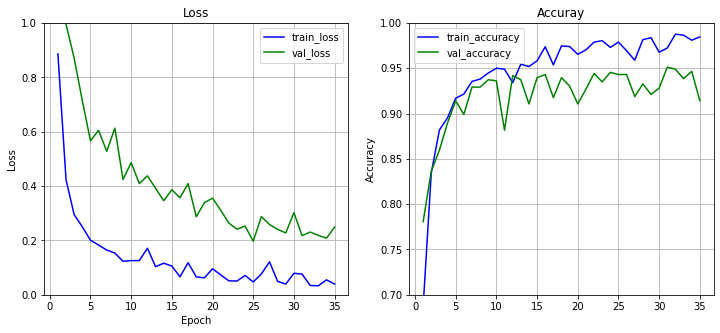

In [25]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Create Model For Subspecies

In [26]:
model2 = tf.keras.models.Sequential()
# conv 1
model2.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model2.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# con2v 2
model2.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# con2v 3
model2.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.5))                           # DO3
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# den2se layers
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(7, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [27]:
saved_model = '/content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/subspecies.h5'
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint(saved_model, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [28]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
history = model2.fit(x_train, y_subs_train, epochs=100,
                     callbacks=[es, mc],
                     validation_data=(x_test, y_subs_test))

Epoch 1/100
131/135 [============================>.] - ETA: 0s - loss: 0.8468 - accuracy: 0.7037
Epoch 1: val_accuracy improved from -inf to 0.78654, saving model to /content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/subspecies.h5
135/135 [==============================] - 3s 17ms/step - loss: 0.8394 - accuracy: 0.7074 - val_loss: 1.0873 - val_accuracy: 0.7865
Epoch 2/100
134/135 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.8277
Epoch 2: val_accuracy improved from 0.78654 to 0.86659, saving model to /content/drive/MyDrive/skku_ai/bee_imgs/bee_imgs/subspecies.h5
135/135 [==============================] - 2s 15ms/step - loss: 0.4337 - accuracy: 0.8276 - val_loss: 1.0334 - val_accuracy: 0.8666
Epoch 3/100
134/135 [============================>.] - ETA: 0s - loss: 0.3226 - accuracy: 0.8736
Epoch 3: val_accuracy did not improve from 0.86659
135/135 [==============================] - 2s 12ms/step - loss: 0.3244 - accuracy: 0.8731 - val_loss: 0.8607 - val_accuracy: 0.

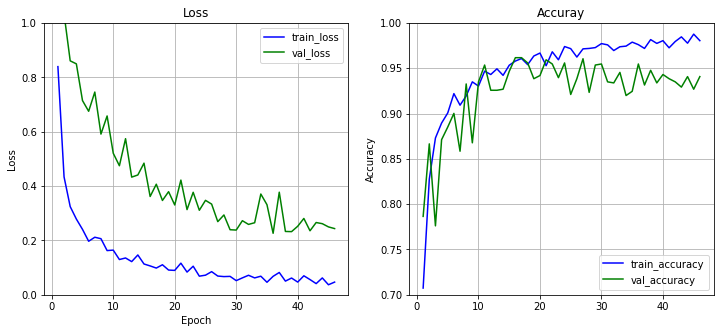

In [30]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [34]:
def Make_Result_Plot(suptitle, data, label, y_max):
    size = data.shape[0]//10
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        cnt = idx * size + size//2
        ax_result[idx//5,idx%5].imshow(data[cnt].reshape((IMG_SIZE,IMG_SIZE, 3)),cmap="binary")
        ax_result[idx//5,idx%5].set_title("test[{}] (label:{} / y:{})".format(cnt, label[cnt], y_max[cnt]))

27/27 [==============================] - 0s 4ms/step


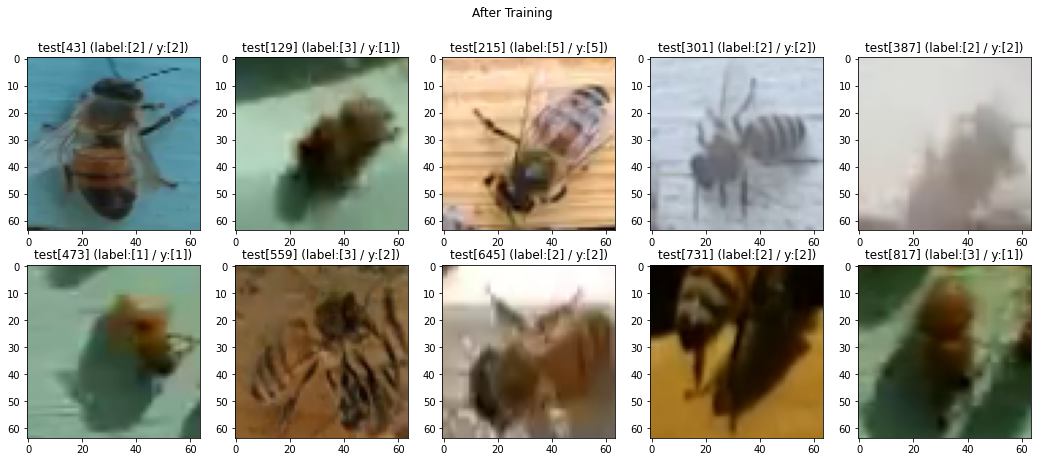

In [36]:
y_out = model1.predict(x_test)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", x_test, y_health_test, y_max)

27/27 [==============================] - 0s 4ms/step


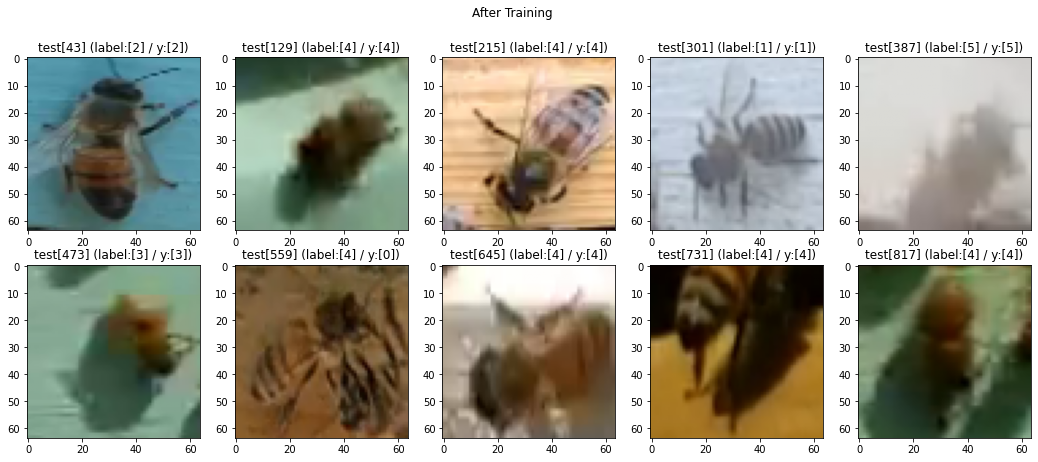

In [35]:
y_out = model2.predict(x_test)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", x_test, y_subs_test, y_max)